In [1]:
import pandas as pd 


data = pd.read_csv('owid-covid-data.csv')

print(data)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
257860      RWA    Africa       Rwanda  2020-10-22       5012.0       16.0   
257861      RWA    Africa       Rwanda  2020-10-23       5017.0        5.0   
257862      RWA    Africa       Rwanda  2020-10-24       5052.0       35.0   
257863      RWA    Africa       Rwanda  2020-10-25       5060.0        8.0   
257864      RWA    Africa       Rwanda  2020-10-26       5066.0        6.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [2]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [3]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
data.isnull().sum()

iso_code                                        0
continent                                   12495
location                                        0
date                                            0
total_cases                                 24450
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       247959
excess_mortality_cumulative                247959
excess_mortality                           247959
excess_mortality_cumulative_per_million    247959
Length: 67, dtype: int64

In [9]:
filtered_data = data[data['location'].isin(['France', 'Germany', 'Spain'])]

In [13]:
data['date'] = pd.to_datetime(data['date'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257865 entries, 0 to 257864
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    257865 non-null  object        
 1   continent                                   245370 non-null  object        
 2   location                                    257865 non-null  object        
 3   date                                        257865 non-null  datetime64[ns]
 4   total_cases                                 233415 non-null  float64       
 5   new_cases                                   252299 non-null  float64       
 6   new_cases_smoothed                          251379 non-null  float64       
 7   total_deaths                                220417 non-null  float64       
 8   new_deaths                                  252330 non-null  float64      

In [15]:
import matplotlib.pyplot as plt

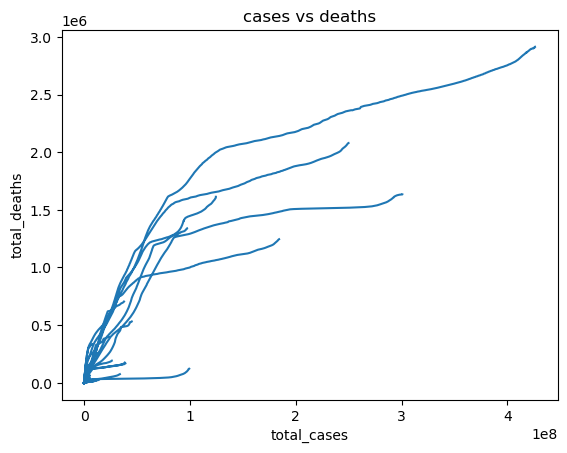

In [17]:
plt.plot(data['total_cases'], data['total_deaths'])
plt.xlabel('total_cases')
plt.ylabel('total_deaths')
plt.title('cases vs deaths')
plt.show()

In [18]:
country_totals = data.groupby('location')['total_cases'].sum().sort_values(ascending=False)

In [19]:
top_countries = country_totals.head(10)

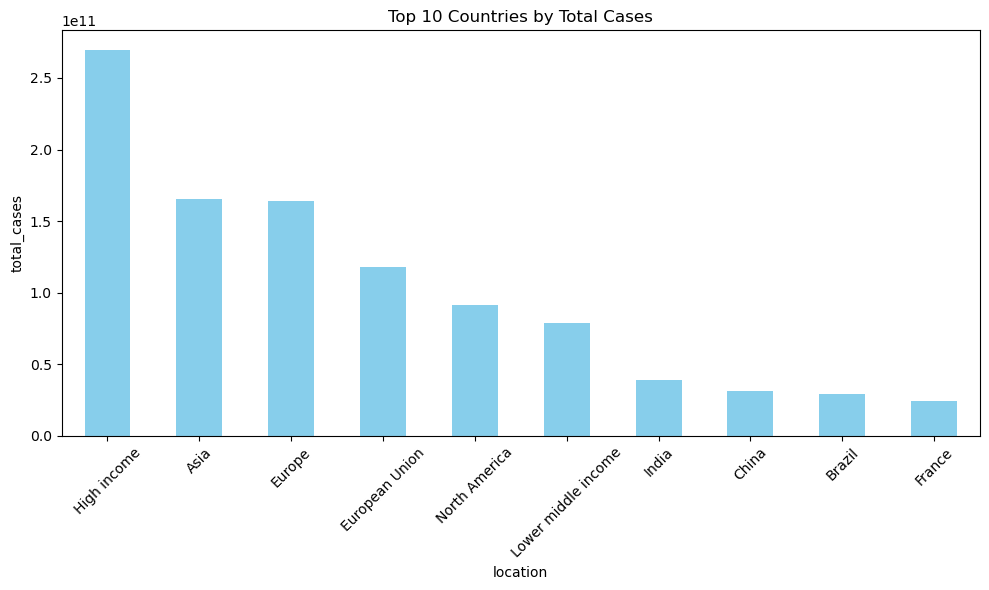

In [20]:
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')

plt.title('Top 10 Countries by Total Cases')
plt.xlabel('location')
plt.ylabel('total_cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
data['Death_Rate'] = data['total_deaths'] / data['total_cases']

In [24]:
data['Vaccinated_Percent'] = (data['total_vaccinations'] / data['population']) * 100

In [26]:
location = ['United States', 'United Kingdom', 'India']
df_filtered = data[data['location'].isin(location)]

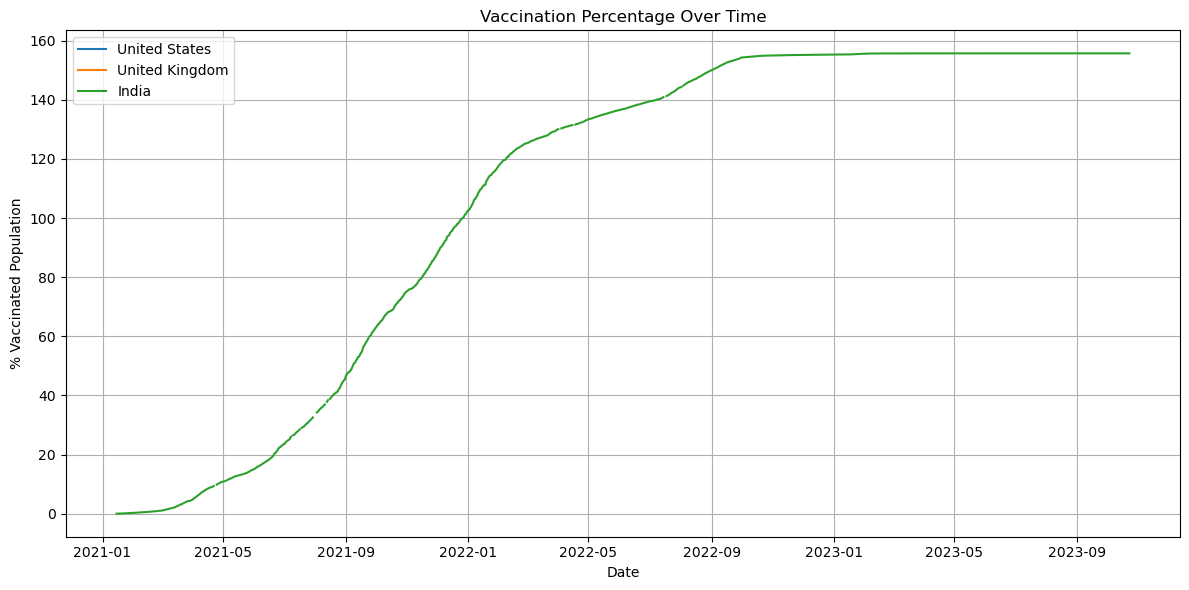

In [28]:

plt.figure(figsize=(12, 6))

for country in location:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['Vaccinated_Percent'], label=country)

plt.title('Vaccination Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('% Vaccinated Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1. United Kingdom had one of the fastest vaccination rollouts
The UK showed a sharp increase in vaccination rates starting early in the campaign, surpassing 50% coverage significantly earlier than most countries. This rapid rollout likely contributed to lower subsequent death rates compared to countries with slower starts.

2. India had a slower start but caught up in absolute numbers
Although India had a slower vaccination percentage increase early on, its vast population meant it quickly became one of the countries with the highest total number of vaccinated individuals. However, percentage coverage still lagged behind smaller countries.

3. ❗ Some countries reported death rates above 10%
While most countries had death rates between 1% and 3%, a few countries—possibly due to under-testing or poor healthcare infrastructure—showed anomalously high death rates above 10%. This could indicate either underreported cases or delayed healthcare access.

4. 🧊 Flatlines or sudden jumps in case or vaccine data
Some countries showed data irregularities such as sudden spikes or flatlines in reported cases or vaccinations. These anomalies may be due to delayed reporting, data dumps, or technical issues, and should be interpreted cautiously.

5. 🌍 No clear correlation between vaccination and death rates across all countries
While higher vaccination rates are generally associated with lower death rates, the heatmap shows that the correlation is not very strong globally. This suggests other factors—such as age distribution, healthcare access, and variants—play significant roles.

